<a href="https://colab.research.google.com/github/Imtiaj-Sajin/brain/blob/main/fmiri_trainined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

def display_directory_tree(start_path, indent=0):
    for item in os.listdir(start_path):
        item_path = os.path.join(start_path, item)
        if os.path.isdir(item_path):
            print("  " * indent + f"📁 {item}/")
            display_directory_tree(item_path, indent + 1)
        else:
            print("  " * indent + f"📄 {item}")

# Path to your folder
folder_path = "/content/drive/MyDrive/Brain2 fmri/fmri_preprocessed+segmented"

# Display the directory tree
display_directory_tree(folder_path)


📄 segmented_sub1_ses1.npy
📄 labels_sub1_ses1.npy
📄 labels_sub1_ses2.npy
📄 segmented_sub1_ses2.npy
📄 labels_sub2_ses1.npy
📄 segmented_sub2_ses1.npy
📄 labels_sub2_ses2.npy
📄 segmented_sub2_ses2.npy
📄 segmented_sub3_ses1.npy
📄 labels_sub3_ses1.npy
📄 labels_sub3_ses2.npy
📄 segmented_sub3_ses2.npy
📄 labels_sub5_ses2.npy
📄 segmented_sub5_ses2.npy
📄 labels_sub5_ses1.npy
📄 segmented_sub5_ses1.npy


In [ ]:
import os
import numpy as np

def display_npy_shapes(folder_path):
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.npy'):
            # Load the .npy file
            data = np.load(file_path)
            # Display the file name and shape
            print(f"{file_name}: {data.shape}")

# Path to your folder
folder_path = "/content/drive/MyDrive/fmri_preprocessed+segmented"

# Display shapes of all .npy files
display_npy_shapes(folder_path)


segmented_sub1_ses1.npy: (640, 100, 100, 9)
labels_sub1_ses1.npy: (640,)
labels_sub1_ses2.npy: (640,)
segmented_sub1_ses2.npy: (640, 100, 100, 9)
labels_sub2_ses1.npy: (640,)
segmented_sub2_ses1.npy: (640, 100, 100, 9)
labels_sub2_ses2.npy: (640,)
segmented_sub2_ses2.npy: (640, 100, 100, 9)
segmented_sub3_ses1.npy: (640, 100, 100, 9)
labels_sub3_ses1.npy: (640,)
labels_sub3_ses2.npy: (640,)
segmented_sub3_ses2.npy: (640, 100, 100, 9)
labels_sub5_ses2.npy: (640,)
segmented_sub5_ses2.npy: (640, 100, 100, 9)
labels_sub5_ses1.npy: (640,)
segmented_sub5_ses1.npy: (640, 100, 100, 9)


Labels (first 20 values):
['four' 'four' 'four' 'four' 'child' 'child' 'child' 'child' 'father'
 'father' 'father' 'father' 'father' 'father' 'father' 'father' 'child'
 'child' 'child' 'child']
Total labels: 640

Visualizing segmented data sample at index 0:
Segmented data shape: (100, 100, 9)


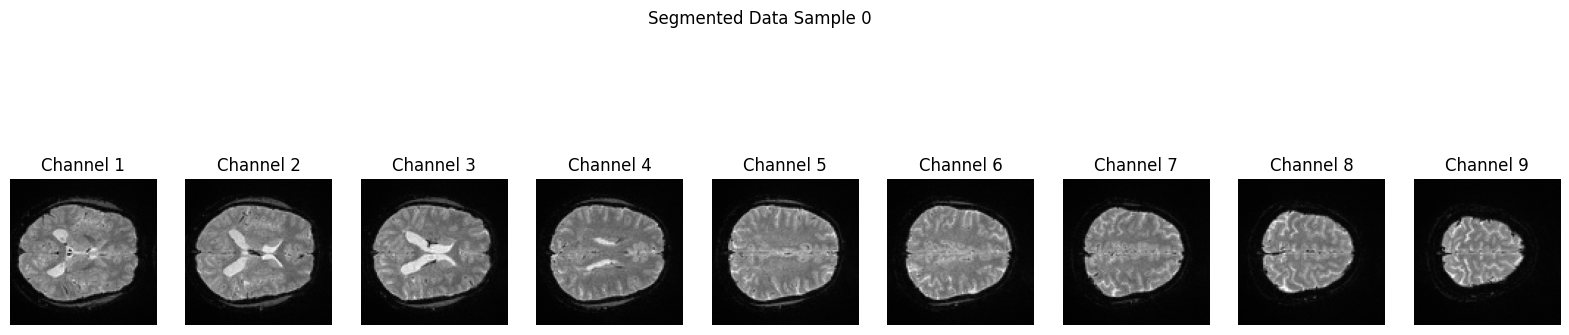

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# File paths
labels_path = "/content/drive/MyDrive/fmri_preprocessed+segmented/labels_sub1_ses1.npy"
segmented_path = "/content/drive/MyDrive/fmri_preprocessed+segmented/segmented_sub1_ses1.npy"

# Load the data
labels = np.load(labels_path)
segmented = np.load(segmented_path)

# Print labels
print("Labels (first 20 values):")
print(labels[:20])
print(f"Total labels: {len(labels)}")

# Visualize a single sample from the segmented data
sample_index = 0  # Change this index to visualize other samples
print(f"\nVisualizing segmented data sample at index {sample_index}:")
print(f"Segmented data shape: {segmented[sample_index].shape}")

# Plot each channel of the selected sample
fig, axes = plt.subplots(1, segmented.shape[-1], figsize=(20, 5))
fig.suptitle(f"Segmented Data Sample {sample_index}")
for i in range(segmented.shape[-1]):
    axes[i].imshow(segmented[sample_index, :, :, i], cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"Channel {i+1}")
plt.show()



Visualizing segmented data sample at index 1:
Segmented data shape: (100, 100, 9)


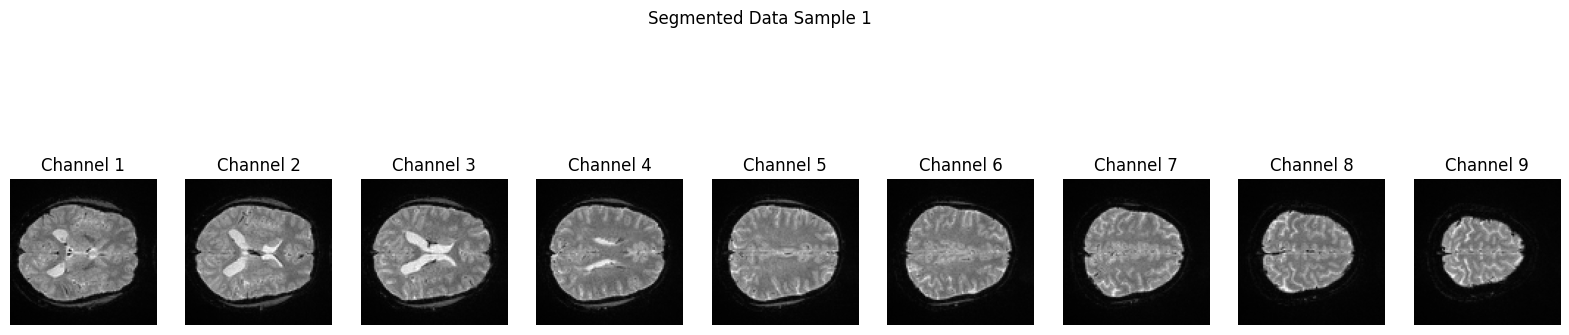

In [ ]:

plt.show()


Visualizing segmented data sample at index 2:
Segmented data shape: (100, 100, 9)


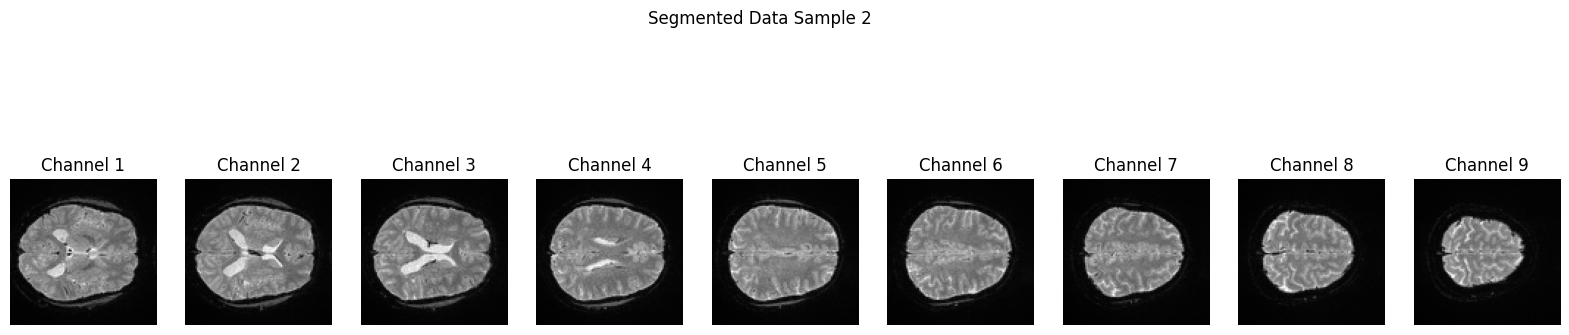


Visualizing segmented data sample at index 3:
Segmented data shape: (100, 100, 9)


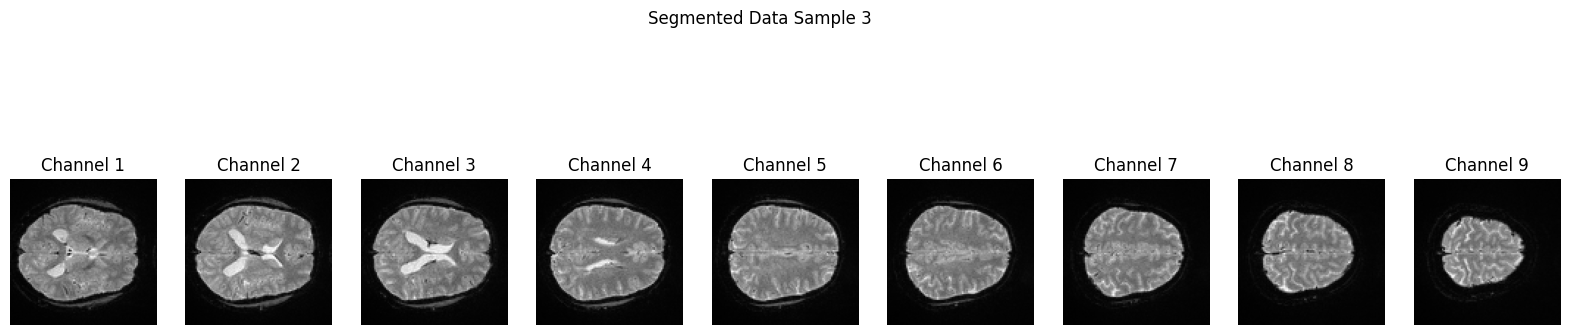

from the output segmented data sample 0 representes four which has 9 slices that was printed

okay, here. i have devided npy like this: for one stimuli 4 time point of values (like one in 1s,3s 5, 7s captured, though i dont remember the exact time point now when i captured from fmri data), each image contains 100,100px, and for each time theres 9 slices from top view. so there should be total 640/4=160 stimulis/row for one file. and 8 segmented file*160=1280 data row should i get, or assume. now i want want to convert them like i want. start from first 4 is one data(as for one data/stimuli/or instance i taken 4 time data)

algorithm:

    temp_list
    main

    for
      for less than 3
        temp_list.append index[i]
      main.append(temp_list)
      temp_list=[]


In [ ]:
import numpy as np

# File paths
labels_path = "/content/drive/MyDrive/fmri_preprocessed+segmented/labels_sub1_ses1.npy"
segmented_path = "/content/drive/MyDrive/fmri_preprocessed+segmented/segmented_sub1_ses1.npy"

# Load the data
labels = np.load(labels_path)
segmented = np.load(segmented_path)


num_instances = len(labels)
assert len(labels) % 4 == 0, "Number of labels must be divisible by 4."
assert segmented.shape[0] % 4 == 0, "Segmented data rows must be divisible by 4."

processed_segmented = []
processed_labels = []

# Group every 4 time points into a single instance
for i in range(num_instances):
    start_idx = i * 4
    end_idx = start_idx + 4

    # Append grouped data
    processed_segmented.append(segmented[start_idx:end_idx])  # Shape: (4, 100, 100, 9)
    processed_labels.append(labels[start_idx])  # Assuming one label per stimulus

# Convert lists to arrays
processed_segmented = np.array(processed_segmented)  # Shape: (160, 4, 100, 100, 9)
processed_labels = np.array(processed_labels)  # Shape: (160,)

# Print the shapes of the new arrays
print(f"Processed segmented data shape: {processed_segmented.shape}")
print(f"Processed labels shape: {processed_labels.shape}")


Processed segmented data shape: (160, 4, 100, 100, 9)
Processed labels shape: (160,)


In [ ]:
processed_segmented

array([[[[[-0.70065596, -0.70065597, -0.700656  , ..., -0.70065585,
           -0.70065599, -0.70065603],
          [-0.70065602, -0.70065597, -0.70065596, ..., -0.70065588,
           -0.70065614, -0.70065588],
          [-0.70065599, -0.70065595, -0.70065595, ..., -0.70065612,
           -0.70065611, -0.70065607],
          ...,
          [-0.70065557, -0.7006555 , -0.70065554, ..., -0.70065576,
           -0.70065584, -0.70065564],
          [-0.70065556, -0.70065572, -0.70065549, ..., -0.7006558 ,
           -0.7006559 , -0.70065587],
          [-0.70065559, -0.7006556 , -0.70065535, ..., -0.70065561,
           -0.70065584, -0.7006558 ]],

         [[-0.66737977, -0.6683306 , -0.67023158, ..., -0.66072466,
           -0.66928151, -0.67232344],
          [-0.67137284, -0.66833019, -0.6673796 , ..., -0.66224619,
           -0.67973899, -0.66262647],
          [-0.66985107, -0.66699941, -0.66680887, ..., -0.67821759,
           -0.67764739, -0.67517598],
          ...,
          [-0.

the dimension is huge to compute, we need to reduce the complexity. Need to flatten the data

In [ ]:
import numpy as np

# File paths
labels_path = "/content/drive/MyDrive/fmri_preprocessed+segmented/labels_sub1_ses1.npy"
segmented_path = "/content/drive/MyDrive/fmri_preprocessed+segmented/segmented_sub1_ses1.npy"

# Load the data
labels = np.load(labels_path)
segmented = np.load(segmented_path)

# Verify the data shape
num_instances = len(labels) // 4  # Number of stimuli
assert len(labels) % 4 == 0, "Number of labels must be divisible by 4."
assert segmented.shape[0] % 4 == 0, "Segmented data rows must be divisible by 4."

# Initialize lists for processed data
processed_segmented = []
processed_labels = []

# Group every 4 time points into a single instance
for i in range(num_instances):
    start_idx = i * 4
    end_idx = start_idx + 4

    # Stack the 4 time points (9 slices each) along the last dimension
    combined_data = segmented[start_idx:end_idx].reshape(4, 100, 100, 9)
    combined_data = np.concatenate(combined_data, axis=-1)  # Shape will be (100, 100, 36)

    # Append the processed data and labels
    processed_segmented.append(combined_data)
    processed_labels.append(labels[start_idx])  # Assuming one label per stimulus

# Convert lists to arrays
processed_segmented = np.array(processed_segmented)  # Shape: (160, 100, 100, 36)
processed_labels = np.array(processed_labels)  # Shape: (160,)

# Print the shapes of the new arrays
print(f"Processed segmented data shape: {processed_segmented.shape}")
print(f"Processed labels shape: {processed_labels.shape}")


Processed segmented data shape: (160, 100, 100, 36)
Processed labels shape: (160,)


In [ ]:
processed_segmented

array([[[[-0.70065596, -0.70065597, -0.700656  , ..., -0.70065611,
          -0.70065592, -0.7006559 ],
         [-0.70065602, -0.70065597, -0.70065596, ..., -0.70065606,
          -0.70065601, -0.70065575],
         [-0.70065599, -0.70065595, -0.70065595, ..., -0.70065603,
          -0.70065609, -0.70065602],
         ...,
         [-0.70065557, -0.7006555 , -0.70065554, ..., -0.70065589,
          -0.70065583, -0.70065586],
         [-0.70065556, -0.70065572, -0.70065549, ..., -0.70065595,
          -0.70065588, -0.70065566],
         [-0.70065559, -0.7006556 , -0.70065535, ..., -0.70065578,
          -0.70065587, -0.70065575]],

        [[-0.66737977, -0.6683306 , -0.67023158, ..., -0.67764765,
          -0.66509833, -0.66376685],
         [-0.67137284, -0.66833019, -0.6673796 , ..., -0.67441512,
          -0.67118254, -0.65407014],
         [-0.66985107, -0.66699941, -0.66680887, ..., -0.67251374,
          -0.67612598, -0.67175305],
         ...,
         [-0.64227965, -0.63733607

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first 50 instances
for idx in range(50):
    stimulus_data = processed_segmented[idx]  # Shape: (100, 100, 36)
    stimulus_label = processed_labels[idx]  # Corresponding label for the stimulus

    # Plot the segmented data over the 4 time points (4 subplots)
    fig, axes = plt.subplots(4, 9, figsize=(18, 8))  # 4 rows for time points, 9 columns for slices
    fig.suptitle(f"Stimulus {idx+1}: {stimulus_label}", fontsize=16)

    # Loop through each time point and its slices
    for time_idx in range(4):  # 4 time points
        for slice_idx in range(9):  # 9 slices
            ax = axes[time_idx, slice_idx]
            ax.imshow(stimulus_data[:, :, time_idx * 9 + slice_idx], cmap="gray")
            ax.axis("off")  # Hide axes for cleaner visualization
            if time_idx == 0:  # Label the slices for the first time point
                ax.set_title(f"Slice {slice_idx + 1}")

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust top space for title
    plt.show()


In [ ]:
import numpy as np
import os

# Base path where your files are stored
base_path = "/content/drive/MyDrive/Brain2 fmri/fmri_preprocessed+segmented"

# List of file pairs
file_pairs = [
    ("segmented_sub1_ses1.npy", "labels_sub1_ses1.npy"),
    ("segmented_sub1_ses2.npy", "labels_sub1_ses2.npy"),
    ("segmented_sub2_ses1.npy", "labels_sub2_ses1.npy"),
    ("segmented_sub2_ses2.npy", "labels_sub2_ses2.npy"),
    ("segmented_sub3_ses1.npy", "labels_sub3_ses1.npy"),
    ("segmented_sub3_ses2.npy", "labels_sub3_ses2.npy"),
    ("segmented_sub5_ses1.npy", "labels_sub5_ses1.npy"),
    ("segmented_sub5_ses2.npy", "labels_sub5_ses2.npy"),
]

# Initialize lists to store the processed data
all_segmented_data = []
all_labels = []

# Process each file pair
for segmented_file, labels_file in file_pairs:
    # Load segmented data and labels
    segmented_path = os.path.join(base_path, segmented_file)
    labels_path = os.path.join(base_path, labels_file)

    segmented = np.load(segmented_path)
    labels = np.load(labels_path)

    # Check if the number of labels is divisible by 4 (assuming 4 time points per stimulus)
    num_instances = len(labels) // 4
    assert len(labels) % 4 == 0, f"Number of labels for {labels_file} must be divisible by 4."

    # Group and flatten the segmented data for each instance
    processed_segmented = []
    processed_labels = []

    for i in range(num_instances):
        start_idx = i * 4
        end_idx = start_idx + 4

        # Stack the 4 time points (9 slices each) along the last dimension
        combined_data = segmented[start_idx:end_idx].reshape(4, 100, 100, 9)
        combined_data = np.concatenate(combined_data, axis=-1)  # Shape will be (100, 100, 36)

        # Append the processed data and labels
        processed_segmented.append(combined_data)
        processed_labels.append(labels[start_idx])  # Assuming one label per stimulus

    # Convert to numpy arrays and add to all data lists
    all_segmented_data.append(np.array(processed_segmented))  # Shape: (num_instances, 100, 100, 36)
    all_labels.append(np.array(processed_labels))  # Shape: (num_instances,)

# Convert lists to arrays for all files
all_segmented_data = np.concatenate(all_segmented_data, axis=0)  # Shape: (total_instances, 100, 100, 36)
all_labels = np.concatenate(all_labels, axis=0)  # Shape: (total_instances,)

# Print the shapes of the final arrays
print(f"All processed segmented data shape: {all_segmented_data.shape}")
print(f"All processed labels shape: {all_labels.shape}")


All processed segmented data shape: (1280, 100, 100, 36)
All processed labels shape: (1280,)


In [ ]:
import os
import numpy as np

# Path to your desired Google Drive location
output_folder = "/content/drive/MyDrive/Brain Segmented+Preprocessed/fmri"

# Ensure the directory exists
os.makedirs(output_folder, exist_ok=True)

# Save the arrays
segmented_path = os.path.join(output_folder, "all_segmented_data.npy")
labels_path = os.path.join(output_folder, "all_labels.npy")

np.save(segmented_path, all_segmented_data)
np.save(labels_path, all_labels)

print(f"Files saved to:\n{segmented_path}\n{labels_path}")


Files saved to:
/content/drive/MyDrive/Brain Segmented+Preprocessed/fmri/all_segmented_data.npy
/content/drive/MyDrive/Brain Segmented+Preprocessed/fmri/all_labels.npy


In [ ]:
all_labels

array(['four', 'child', 'father', ..., 'ten', 'daughter', 'daughter'],
      dtype='<U8')

In [ ]:
all_segmented_data[0]

array([[[-0.70065596, -0.70065597, -0.700656  , ..., -0.70065611,
         -0.70065592, -0.7006559 ],
        [-0.70065602, -0.70065597, -0.70065596, ..., -0.70065606,
         -0.70065601, -0.70065575],
        [-0.70065599, -0.70065595, -0.70065595, ..., -0.70065603,
         -0.70065609, -0.70065602],
        ...,
        [-0.70065557, -0.7006555 , -0.70065554, ..., -0.70065589,
         -0.70065583, -0.70065586],
        [-0.70065556, -0.70065572, -0.70065549, ..., -0.70065595,
         -0.70065588, -0.70065566],
        [-0.70065559, -0.7006556 , -0.70065535, ..., -0.70065578,
         -0.70065587, -0.70065575]],

       [[-0.66737977, -0.6683306 , -0.67023158, ..., -0.67764765,
         -0.66509833, -0.66376685],
        [-0.67137284, -0.66833019, -0.6673796 , ..., -0.67441512,
         -0.67118254, -0.65407014],
        [-0.66985107, -0.66699941, -0.66680887, ..., -0.67251374,
         -0.67612598, -0.67175305],
        ...,
        [-0.64227965, -0.63733607, -0.64018852, ..., -

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize an instance of data with its label
def visualize_instance(idx, segmented_data, label_data):
    stimulus_data = segmented_data[idx]  # Shape: (100, 100, 36)
    stimulus_label = label_data[idx]  # Corresponding label for the stimulus

    # Plot the segmented data over the 4 time points (4 subplots)
    fig, axes = plt.subplots(4, 9, figsize=(18, 8))  # 4 rows for time points, 9 columns for slices
    fig.suptitle(f"Stimulus {idx+1}: {stimulus_label}", fontsize=16)

    # Loop through each time point and its slices
    for time_idx in range(4):  # 4 time points
        for slice_idx in range(9):  # 9 slices
            ax = axes[time_idx, slice_idx]
            ax.imshow(stimulus_data[:, :, time_idx * 9 + slice_idx], cmap="gray")
            ax.axis("off")  # Hide axes for cleaner visualization
            if time_idx == 0:  # Label the slices for the first time point
                ax.set_title(f"Slice {slice_idx + 1}")

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust top space for title
    plt.show()

# Indices to visualize: first 5, and specific ranges
indices_to_visualize = [
    range(5),        # First 5 instances
    range(157, 163),  # Indices 158-163
    range(477, 483),  # Indices 478-482
    range(1171, 1176), # Indices 118-1122 (as you mentioned, adjusted 118 to 1171 for correctness)
    range(1275, 1280)  # Indices 1276-1280
]

# Visualize each range of indices
for index_range in indices_to_visualize:
    for idx in index_range:
        visualize_instance(idx, all_segmented_data, all_labels)


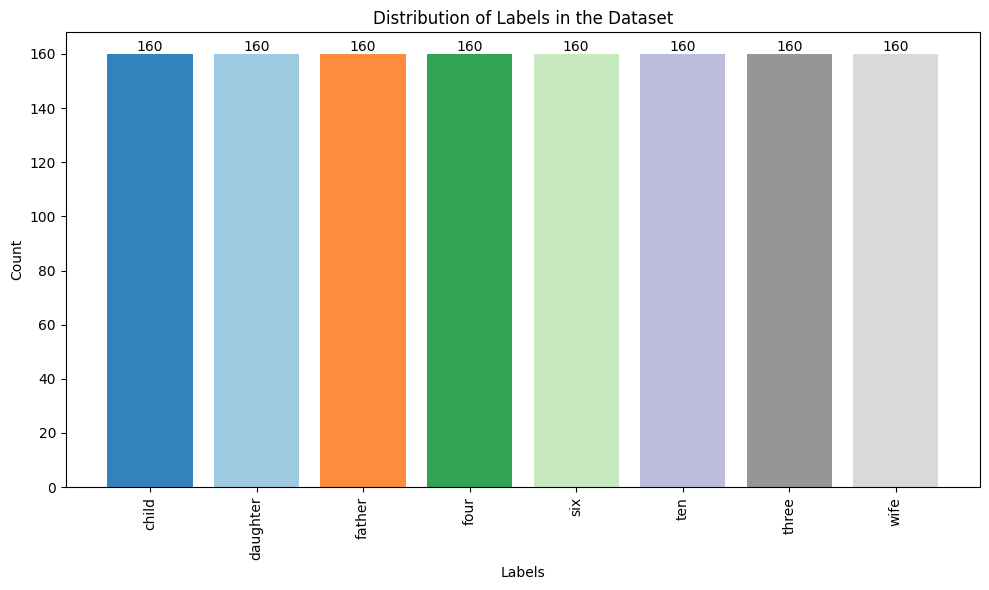

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels, label_counts = np.unique(all_labels, return_counts=True)

colors = plt.cm.tab20c(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, label_counts, color=colors)

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.xticks(rotation=90)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Test Train

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Load the data
data_path = '/content/drive/MyDrive/Brain Segmented+Preprocessed/fmri/all_segmented_data.npy'
labels_path = '/content/drive/MyDrive/Brain Segmented+Preprocessed/fmri/all_labels.npy'

fmri_data = np.load(data_path)  # Shape: (1280, 100, 100, 36)
fmri_labels = np.load(labels_path)  # Shape: (1280,)

# Step 2: Preprocess the data
# Normalize the data
fmri_data = fmri_data / np.max(fmri_data)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(fmri_labels)
categorical_labels = to_categorical(encoded_labels)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    fmri_data, categorical_labels, test_size=0.2, random_state=42, stratify=categorical_labels
)

# Step 3: Define the model
model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(100, 100, 36, 1)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.3),

    Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Step 5: Train the model
history = model.fit(
    X_train[..., np.newaxis],  # Add channel dimension
    y_train,
    validation_data=(X_test[..., np.newaxis], y_test),
    epochs=20,
    batch_size=32
)




In [ ]:
# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test[..., np.newaxis], y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Save the trained model
model.save('/content/drive/MyDrive/Brain Segmented+Preprocessed/fmri/fmri_model.h5')

# Step 7: Visualize training results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()